In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
num_schemes = 5
num_lengthes = 4

In [9]:
I = np.empty((num_lengthes, num_schemes))
U = np.empty((num_lengthes, num_schemes))
l = np.empty(num_lengthes)
for j in range(num_schemes):
    df = pd.read_csv(f'schemes/{j + 1}.csv')
    I[:, j] = df.loc[:, 'I']
    U[:, j] = df.loc[:, 'U']
    l[:] = df.loc[:, 'l']

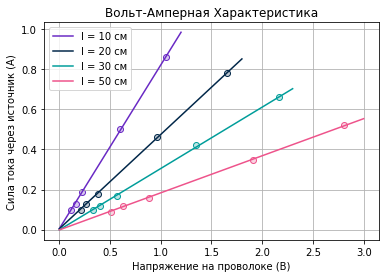

In [21]:
fig, ax = plt.subplots()
ax.set_title('Вольт-Амперная Характеристика')
ax.set_ylabel('Сила тока через источник (А)')
ax.set_xlabel('Напряжение на проволоке (В)')
ax.grid()

colors = ['#6929c4', '#012749', '#009d9a', '#ee538b']
for i in range(num_lengthes):
    k, b = np.polyfit(U[i], I[i], 1)
    x = np.arange(max(U[i]) + 0.2, step=0.1)
    ax.plot(x, k * x + b, color=colors[i],
            label=f'l = {round(l[i])} см')
    ax.scatter(U[i], I[i], c=colors[i] + '40', edgecolors=colors[i])
ax.legend()

In [22]:
Rs = [(U[i] / I[i]).mean() for i in range(num_lengthes)]

In [23]:
df = pd.read_csv('bridge.csv')
Rb = df.loc[:, 'R']

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Сравнение измерительных приборов по удельным сопротивлениям')
ax.set_ylabel('Удельное сопротивление')
ax.set_xlabel('Длина проволоки (см)')
ax.grid()